In [1]:
#CLIP model

In [ ]:
#pip install transformers

In [2]:
from transformers.utils import logging
logging.set_verbosity_error()

/Users/anoopmishra/Repositories/anoop/HuggingFace/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from transformers import CLIPModel

In [4]:
model = CLIPModel.from_pretrained(
    "openai/clip-vit-large-patch14")

In [5]:
from transformers import AutoProcessor

In [6]:
processor = AutoProcessor.from_pretrained(
    "openai/clip-vit-large-patch14")

In [7]:
from PIL import Image
image = Image.open("spring-images-min.jpg")

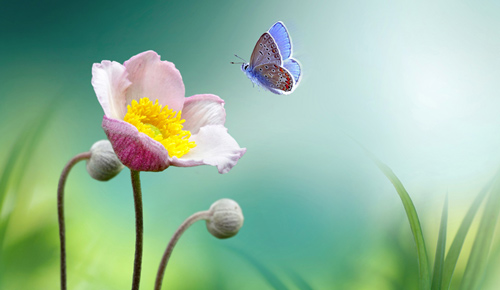

In [8]:
image

In [9]:
labels = ["a photo of monkey", "a photo of butterfly"]

In [10]:
inputs = processor(text=labels,
                   images=image,
                   return_tensors="pt",
                   padding=True)

In [11]:
outputs = model(**inputs)

In [12]:
outputs

CLIPOutput(loss=None, logits_per_image=tensor([[13.1078, 23.9981]], grad_fn=<TBackward0>), logits_per_text=tensor([[13.1078],
        [23.9981]], grad_fn=<MulBackward0>), text_embeds=tensor([[-0.0021,  0.0052,  0.0284,  ...,  0.0166,  0.0251,  0.0189],
        [-0.0028,  0.0204,  0.0463,  ...,  0.0109,  0.0103, -0.0308]],
       grad_fn=<DivBackward0>), image_embeds=tensor([[ 3.8408e-02,  2.8678e-02,  1.8296e-02,  2.8019e-02,  1.8325e-02,
          3.8739e-02,  3.2341e-02, -3.7984e-03,  3.7105e-02,  4.9095e-03,
          5.3839e-03,  1.1407e-02, -7.6866e-03, -2.3118e-03,  2.1016e-03,
          2.9617e-04, -2.9104e-02,  1.9653e-02,  2.0475e-02, -1.2345e-02,
         -3.5488e-02, -2.9633e-02,  1.0226e-02,  3.8229e-02, -1.3553e-02,
         -1.9303e-03,  2.7614e-02, -2.9961e-02, -7.6919e-03, -8.8248e-03,
         -2.2505e-02,  2.0743e-02,  9.2489e-03,  3.7138e-03,  4.7764e-02,
         -1.0788e-02,  1.0426e-02,  3.1415e-02, -2.5848e-02, -1.9142e-02,
          1.6056e-03, -2.1153e-03, -1.7

In [13]:
outputs.logits_per_image

tensor([[13.1078, 23.9981]], grad_fn=<TBackward0>)

In [14]:
probability = outputs.logits_per_image.softmax(dim=1)[0]

In [15]:
probability = list(probability)
for i in range(len(labels)):
  print(f"label: {labels[i]} - probability of {probability[i].item():.4f}")

label: a photo of monkey - probability of 0.0000
label: a photo of butterfly - probability of 1.0000
